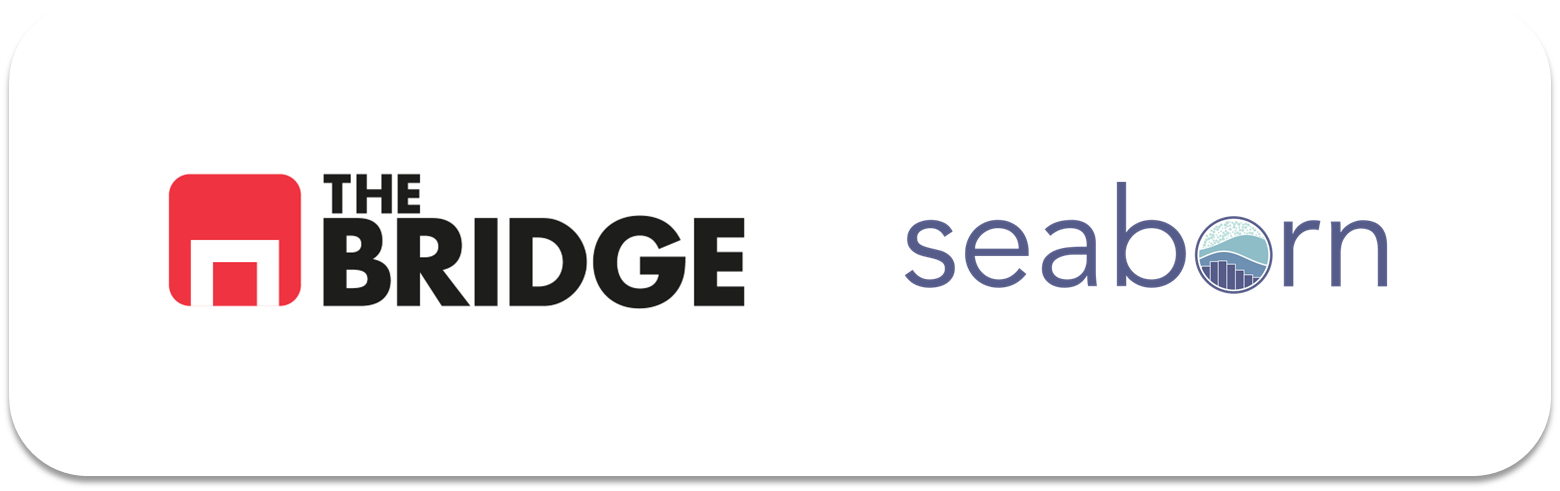

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [3]:
df = pd.read_csv("./data/california_cities.csv")

In [4]:
df.sample(10)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
451,451,Visalia,36.316667,-119.300000,101.0,331.0,124442,36.266,36.246,0.020,93.928,93.876,0.0512,0.05
290,290,Oakland,37.804444,-122.270833,NaN,43.0,406253,78.002,55.786,22.216,202.024,144.485,57.5400,28.48
240,240,LosBanos,37.058333,-120.850000,36.0,118.0,35972,10.117,9.993,0.124,26.203,25.882,0.3210,1.22
309,309,Paramount,33.900000,-118.166667,21.0,69.0,54098,4.840,4.729,0.111,12.536,12.249,0.2860,2.28
222,222,Lawndale,33.886667,-118.353611,18.0,59.0,32769,1.974,1.974,0.000,5.113,5.113,0.0000,0.00
397,397,Saratoga,37.272500,-122.019444,NaN,410.0,29926,12.382,12.382,0.000,32.070,32.070,0.0000,0.00
308,308,Paradise,39.759722,-121.621389,542.0,1778.0,26249,18.322,18.308,0.014,47.455,47.418,0.0370,0.08
79,79,Cloverdale,38.799167,-123.017222,NaN,335.0,8618,2.648,2.648,0.000,6.857,6.857,0.0000,0.00
86,86,Colusa,39.214444,-122.009444,16.0,52.0,5971,1.834,1.834,0.000,4.751,4.751,0.0000,0.00
46,46,Brea,33.923333,-117.888889,110.0,361.0,39282,12.109,12.078,0.031,31.363,31.283,0.0800,0.26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [6]:
df_california = df.copy()

In [7]:
df_california.dropna(inplace=True)

In [8]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [47]:
def pintar_diagrama(df, col1, col2, col_cat=None, size=None, escala=1):
    plt.figure(figsize=(10, 6))
    
    if col_cat:
        if size and isinstance(size, str):  
            size_column = df[size].values * escala
            sns.scatterplot(data=df, x=col1, y=col2, hue=col_cat, s=size_column, legend=False)
        else:
            sns.scatterplot(data=df, x=col1, y=col2, hue=col_cat, s=size*escala, legend=False)
    else:
        if size and isinstance(size, str):  
            size_column = df[size].values * escala
            sns.scatterplot(data=df, x=col1, y=col2, s=size_column, legend=False)
        else:
            sns.scatterplot(data=df, x=col1, y=col2, s=size, legend=False)  
    
    plt.title(f"Diagrama de dispersión entre {col1} y {col2} con {col_cat} en color")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

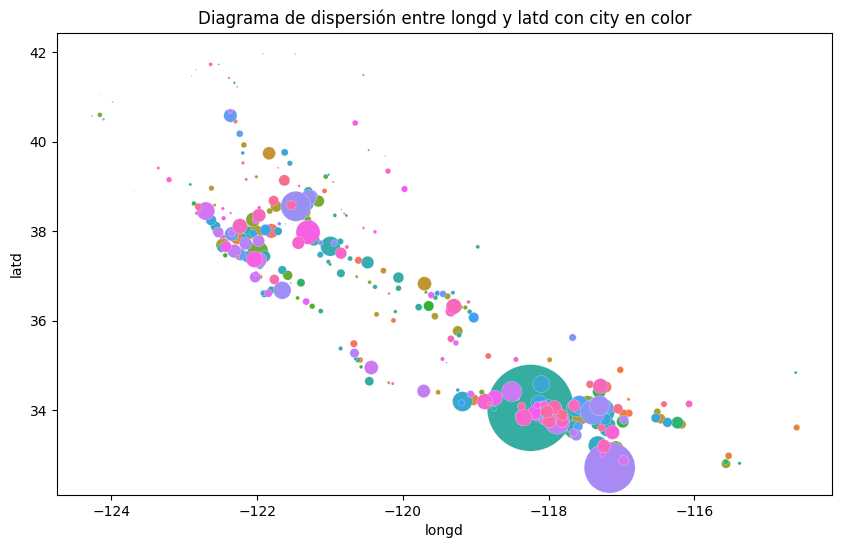

In [52]:
pintar_diagrama(df_california, "longd", "latd", col_cat= "city", size="population_total", escala= 0.001)

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

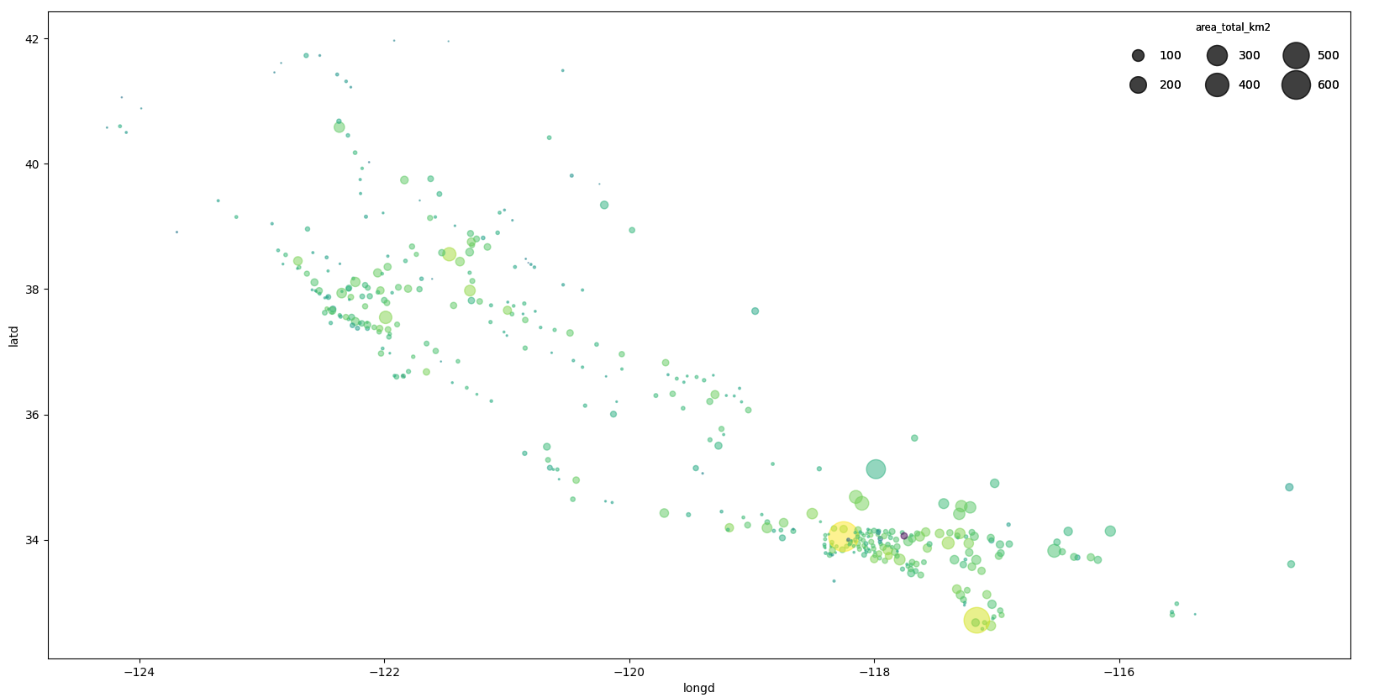

In [80]:
def pintar_diagrama(df, col1, col2, col_cat=None, size=None, escala=1):
    plt.figure(figsize=(13, 6))
    
    if col_cat:
        if size and isinstance(size, str):  
            size_column = df[size].values * escala
            sns.scatterplot(data=df, x=col1, y=col2, hue=col_cat, s=size_column, legend=False, alpha=0.5)
        else:
            sns.scatterplot(data=df, x=col1, y=col2, hue=col_cat, s=size*escala, legend=False, alpha=0.5)
    else:
        if size and isinstance(size, str):  
            size_column = df[size].values * escala
            sns.scatterplot(data=df, x=col1, y=col2, s=size_column, legend=False, alpha=0.5)
        else:
            sns.scatterplot(data=df, x=col1, y=col2, s=size, legend=False, alpha=0.5)  
    
    plt.title(f"Diagrama de dispersión entre {col1} y {col2} con {col_cat} en color")
    plt.xlabel(col1, fontsize=7)
    plt.ylabel(col2, fontsize=7)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.show()

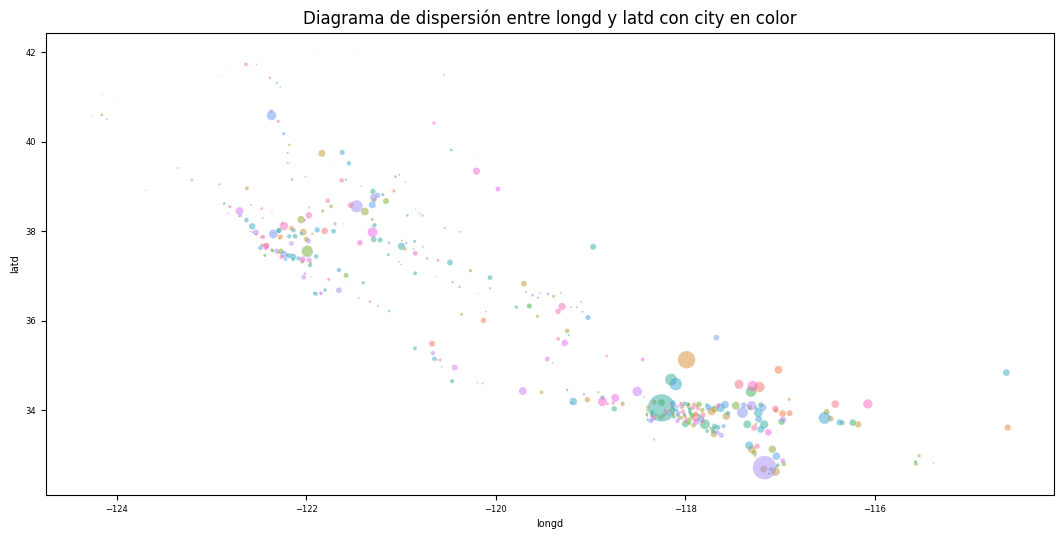

In [81]:
pintar_diagrama(df_california, "longd", "latd", col_cat= "city", size="area_total_km2", escala= 0.3)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [95]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [96]:
media_hombre = df_titanic[df_titanic["sex"] == "male"]["age"].mean()
media_mujer = df_titanic[df_titanic["sex"] == "female"]["age"].mean()
media_niños = df_titanic[df_titanic["age"] < 18]["age"].mean()

In [97]:
df_titanic.loc[(df_titanic["sex"] == "male") & (df_titanic["age"].isna()), "age"] = media_hombre
df_titanic.loc[(df_titanic["sex"] == "female") & (df_titanic["age"].isna()), "age"] = media_mujer
df_titanic.loc[(df_titanic["age"] < 18) & (df_titanic["age"].isna()), "age"] = media_niños

In [98]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [99]:
df_titanic = df_titanic.drop("deck", axis=1)

In [100]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


In [102]:
df_titanic = df_titanic.dropna()

In [103]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 92.0+ KB


In [104]:
df_titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
806,0,1,male,39.000000,0,0,0.0000,S,First,man,True,Southampton,no,True
741,0,1,male,36.000000,1,0,78.8500,S,First,man,True,Southampton,no,False
306,1,1,female,27.915709,0,0,110.8833,C,First,woman,False,Cherbourg,yes,True
526,1,2,female,50.000000,0,0,10.5000,S,Second,woman,False,Southampton,yes,True
698,0,1,male,49.000000,1,1,110.8833,C,First,man,True,Cherbourg,no,False


In [112]:
# 1 El titanic fue un accidente con una tasa de mortalidad alta.

print(df_titanic.shape)
print("\n")
print(df_titanic.who.value_counts())

(889, 14)


who
man      537
woman    269
child     83
Name: count, dtype: int64


In [113]:
df_titanic.alive.value_counts()

alive
no     549
yes    340
Name: count, dtype: int64

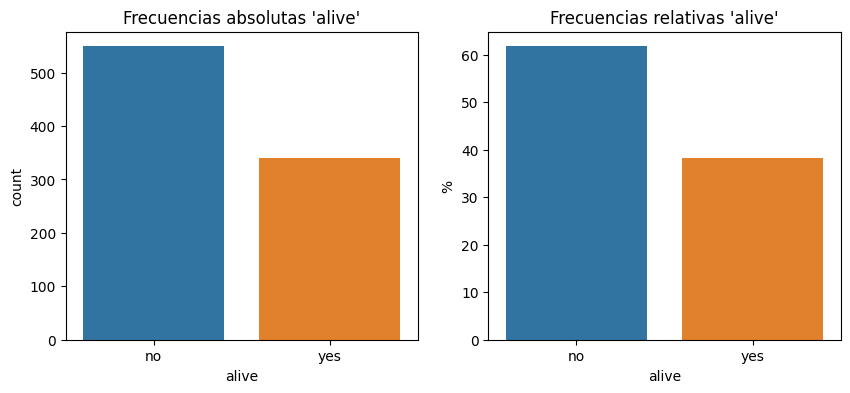

In [127]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
sns.countplot(x="alive", data=df_titanic, ax = axs[0], hue="alive", legend=False)
valores = df_titanic.alive.value_counts(normalize = True) *100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[0].set_title("Frecuencias absolutas 'alive'")
axs[1].set_title("Frecuencias relativas 'alive'")
axs[1].set_ylabel("%");


In [128]:
fig.savefig("./data/my_figure_1.png")

In [133]:
# 2 En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero..



In [140]:
conteo = df_titanic.loc[:,["who", "alive"]].value_counts()
conteo

who    alive
man    no       449
woman  yes      203
man    yes       88
woman  no        66
child  yes       49
       no        34
Name: count, dtype: int64

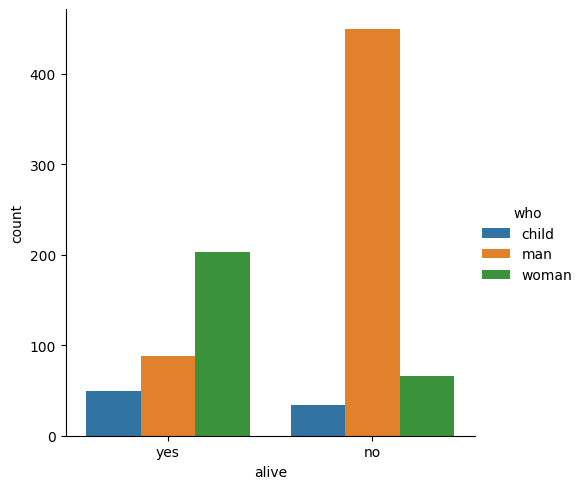

In [146]:
var1 = sns.catplot(x="alive",
                   hue="who",
                   kind="count",
                   edgecolor=".5",
                   orient="V",
                   data=df_titanic.sort_values("who"));

In [149]:
var1.savefig("./data/my_figure_2.png")

In [163]:
# 3 ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar

clase = df_titanic.groupby(["who", "alive", "class"]).size()
clase

who    alive  class 
child  no     First       1
              Third      33
       yes    First       5
              Second     19
              Third      25
man    no     First      77
              Second     91
              Third     281
       yes    First      42
              Second      8
              Third      38
woman  no     First       2
              Second      6
              Third      58
       yes    First      87
              Second     60
              Third      56
dtype: int64

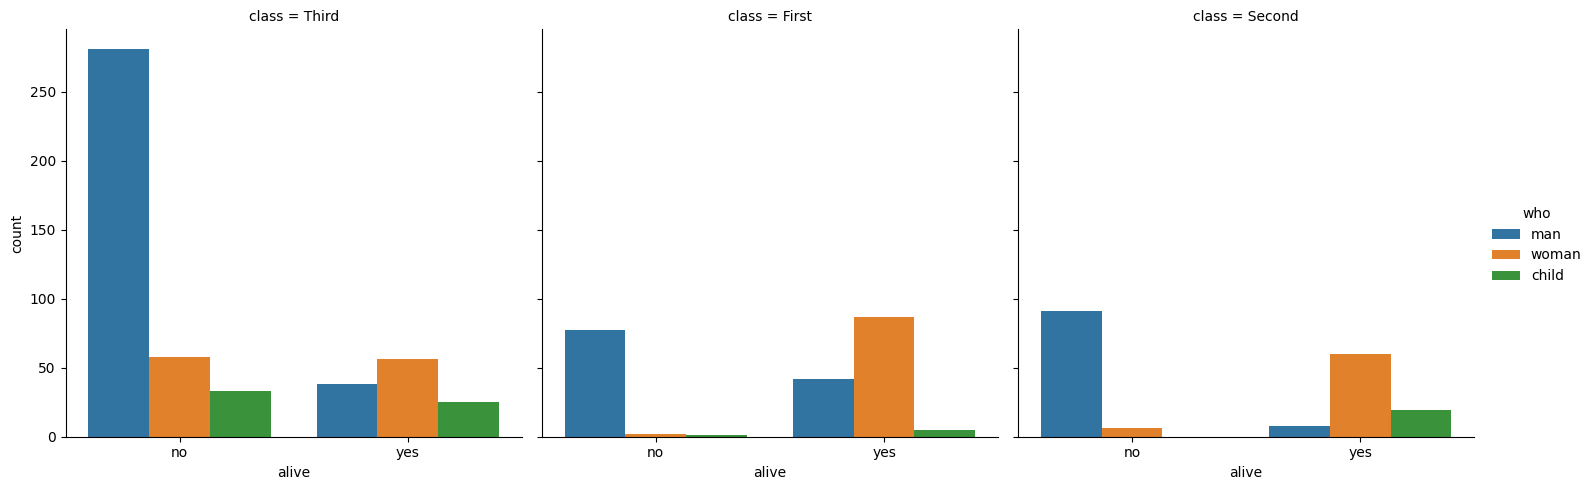

In [164]:
var2 = sns.catplot(x = "alive", col = "class", hue= "who", data = df_titanic, kind = "count");

In [165]:
var2.savefig("./data/my_figure_3.png")

In [168]:
# 4 ... las diferencias de tasas de supervivencia entre mujeres y niños.

df_woman_child = df_titanic.loc[df_titanic["who"].isin(["woman", "child"])]

In [175]:
df_woman_child.groupby(["class", "who"]).size().reset_index(name="count")

,class,who,count
0,First,child,6
1,First,woman,89
2,Second,child,19
3,Second,woman,66
4,Third,child,58
5,Third,woman,114


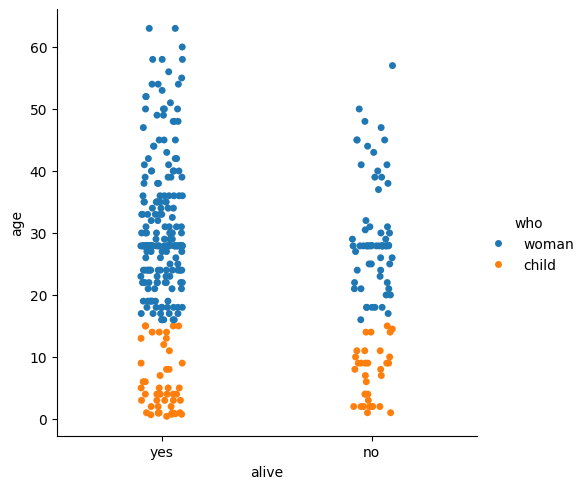

In [181]:
var3 = sns.catplot(x ="alive", y = "age", hue = "who", data = df_woman_child, kind = "strip");

In [182]:
var3.savefig("./data/my_figure_4.png")

In [186]:
# 5 Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

relacion = df_titanic.groupby(["embark_town", "alive"])["class"].value_counts()
relacion

embark_town  alive  class 
Cherbourg    no     Third      41
                    First      26
                    Second      8
             yes    First      59
                    Third      25
                    Second      9
Queenstown   no     Third      45
                    Second      1
                    First       1
             yes    Third      27
                    Second      2
                    First       1
Southampton  no     Third     286
                    Second     88
                    First      53
             yes    Second     76
                    First      74
                    Third      67
Name: count, dtype: int64

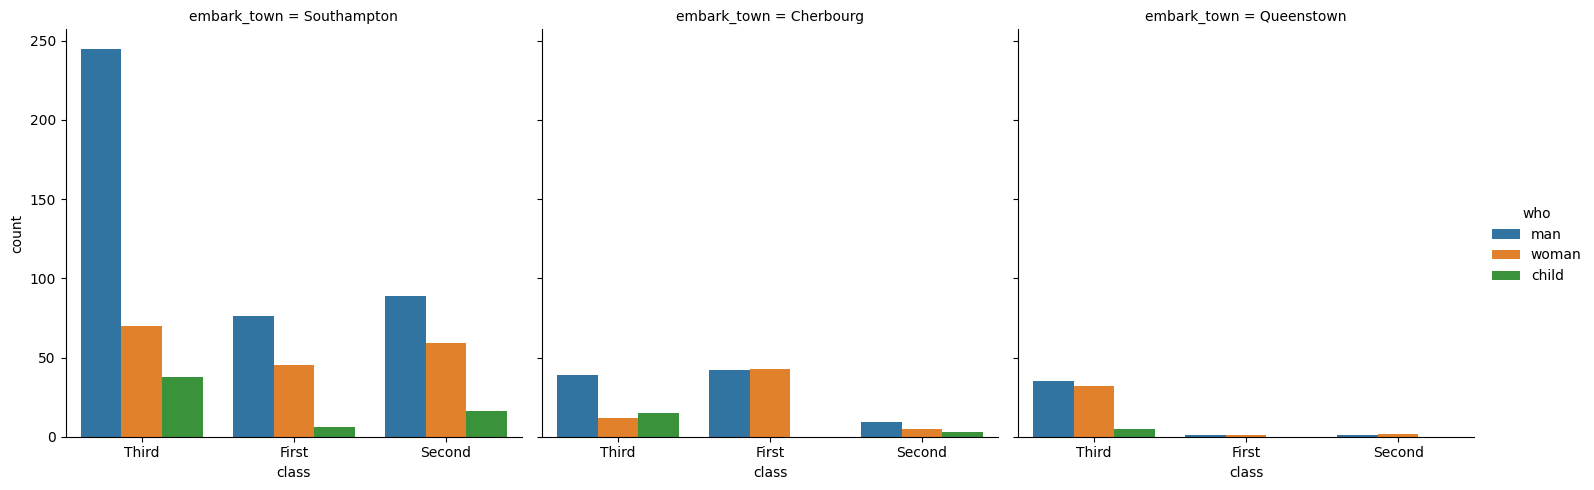

In [188]:
var4 = sns.catplot(x = "class", col = "embark_town", hue= "who", data = df_titanic, kind = "count");
var4

In [189]:
var4.savefig("./data/my_figure_5.png")

In [191]:
df_titanic.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64